# Zero to Hero

## 2.01 Optimizacion Bayesiana

### Advertencia

El uso del método de Optimización Bayesiana para la optimización de hiperparámetros en modelos predictivos tiene menos de una década.
Entender los fundamentos de la O.B. requieren de una sólida formación matemática y **no** son el objetivo de esta asignatura.
Para quienes deseen aventurarse a los detalles técnicos:
* El paper original de la libreria mlrMBO (año 2018 )   https://arxiv.org/pdf/1703.03373.pdf
* El método de Kriging , tal cual se deriva del uso original, en este pequeño libro de 106 páginas "Basic Steps in Geostatistics: The Variogram and Kriging" https://www.pdfdrive.com/basic-steps-in-geostatistics-the-variogram-and-kriging-e187336318.html

### El código

In [14]:
#Ejemplo de optimizacion bayesiana, univariada

#limpio la memoria
rm( list=ls() )  #remove all objects
gc()             #garbage collection

require("data.table")
#paquetes necesarios para la Bayesian Optimization
require("DiceKriging")
require("mlrMBO")

options(repr.plot.width=20, repr.plot.height=10)


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2389748,127.7,4791478,255.9,4791478,255.9
Vcells,4183914,32.0,8389073,64.1,8389073,64.1


### Defino la funcion a optimizar, un polinomio de grado 4

In [15]:
func_univariada01  <- function( x )
{
  y  <- -2 * (x+13) * (x-3) * (x-7) * (x-19)

  return( y )
}

Grafico la funcion

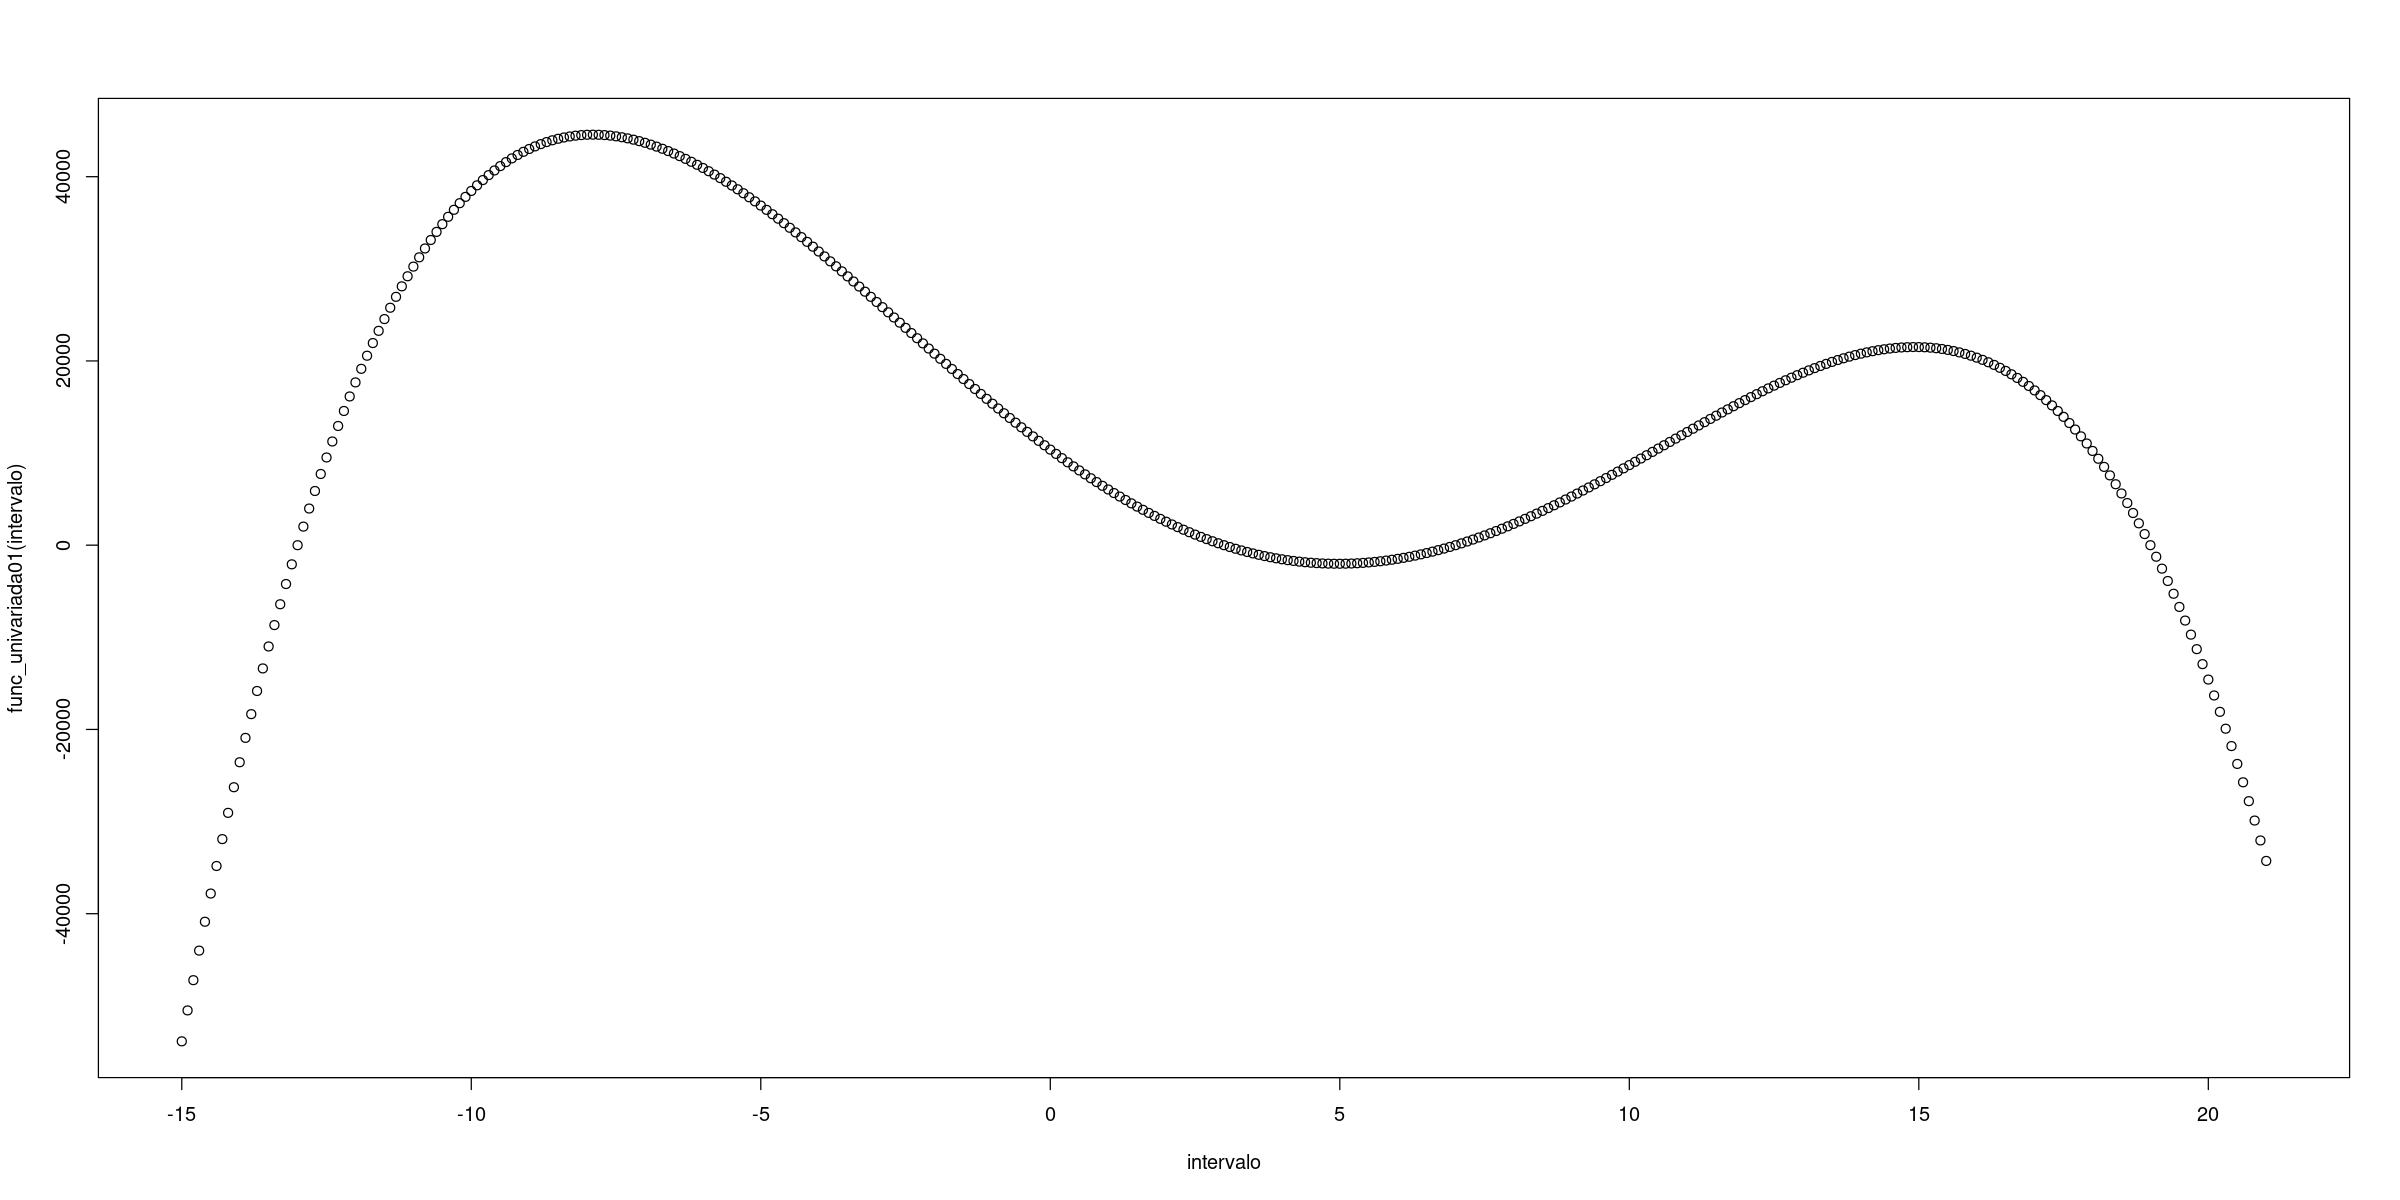

In [16]:
intervalo  <- seq(-15,21,0.1)
plot(intervalo, func_univariada01(intervalo))

La funcion tiene dos máximos, uno de ellos es el global.

### Optimizacion Bayesiana

¿Qué tan rápido encontrará la Optmización Bayesiana el máximo global?

Defino las caracteristicas de la optimizacion

* **fn**    es el nombre de la funcion
* **minimize**   por defecto es TRUE,  pero en este caso le asigno FALSE, ya que deseo maximizar  el valor
* **par.set**  indica cuales son los hiperparmetros de la funcion, en este caso hay una sola variable que llamé  x
---
* **makeNumericParam** indica que ese hiperparámetro es un numero real, una variable continua  ( no es ni un entero ni una categoria )

In [17]:
obj.fun  <- makeSingleObjectiveFunction(
              fn=       func_univariada01,
              minimize= FALSE,   #estoy Maximizando la ganancia
              par.set=  makeParamSet(  makeNumericParam( "x", lower= -100, upper=  100) ),
             )

ahora defino la funcion proxy, la que se construye internamente intentando emular la realidad

* **cl**  es la clase de learner,  "reg.km" indica el método de kriging "**reg**ression **k**riging **m**ethodd"
* **predict.type**  es el tipo de prediccion que deseo me devuelva, "se" significa que espero dos valores  media y standard error
* **covtype**    es la funcion de covarianza que se va a utilizar, cual es la covarianza de dos mediciones como fucion de la distancia entre los puntos donde fueron tomadas las mediciones, fue inventada por Bertil Matérn 

El método de kriging puede verse en su forma original (la geología) , esta presentación https://www.youtube.com/watch?v=ZB7GvJrNKq0

In [18]:
fproxy  <- makeLearner( cl= "regr.km",
                        predict.type= "se", 
                        covtype= "matern3_2" )

ultima definicion,  especificar la optimizacion bayesiana
*  **crit**   indica el criterio con el que se completan los valores iniciales "no inteligentes"
*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.

In [19]:
ctrl  <- makeMBOControl()
ctrl  <- setMBOControlInfill( ctrl, crit= makeMBOInfillCritEI())
ctrl  <- setMBOControlTermination( ctrl, iters= 25 )

finalmente , lanzo la Optimizacion Bayesiana

* **fun**  es la especificacion de la funcion que deseo optimizar, si maximizo o minimizo, cuales son las variables de la misma
* **learner**  especifica cual es la función proxy interna que va a utilizar la Optimziación Bayesiana
* **control**  indica la la forma en que se harán las iteraciones

In [20]:
run  <- mbo( fun=      obj.fun, 
             learner= fproxy, 
             control= ctrl )

Computing y column(s) for design. Not provided.

[mbo] 0: x=19.5 : y = -7.2e+03 : 0.0 secs : initdesign

[mbo] 0: x=-60.2 : y = -3.17e+07 : 0.0 secs : initdesign

[mbo] 0: x=-27.5 : y = -1.43e+06 : 0.0 secs : initdesign

[mbo] 0: x=59.7 : y = -1.76e+07 : 0.0 secs : initdesign




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -71.42803 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       71.428  |proj g|=     0.029564
At iterate     1  f =       71.427  |proj g|=      0.029562
At iterate     2  f =       71.185  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 71.1853

F = 71.1853
final  value 71.185292 
converged


[mbo] 1: x=-28.2 : y = -1.57e+06 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -85.83743 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       85.837  |proj g|=     0.005191
At iterate     1  f =       85.837  |proj g|=     0.0051827
At iterate     2  f =        85.83  |proj g|=      0.001175
At iterate     3  f =        85.83  |proj g|=    0.00019907
At iterate     4  f =        85.83  |proj g|=    6.3165e-06
At iterate     5  f =        85.83  |proj g|=    3.5347e-08

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 3.53469e-08
final function

[mbo] 2: x=1.12 : y = 5.57e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -102.6577 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       102.66  |proj g|=    0.0036777
At iterate     1  f =       102.66  |proj g|=     0.0036748
At iterate     2  f =       102.65  |proj g|=    0.00092525
At iterate     3  f =       102.65  |proj g|=    0.00016842
At iterate     4  f =       102.65  |proj g|=    6.2802e-06
At iterate     5  f =       102.65  |proj g|=    4.4736e-08

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 4.47363e-08
final function

[mbo] 3: x=11.1 : y = 1.25e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -118.1332 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       118.13  |proj g|=     0.001057
At iterate     1  f =       118.13  |proj g|=     0.0010564
At iterate     2  f =       118.13  |proj g|=    6.0143e-05
At iterate     3  f =       118.13  |proj g|=    3.6712e-06
At iterate     4  f =       118.13  |proj g|=    1.3801e-08

iterations 4
function evaluations 5
segments explored during Cauchy searches 4
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.38012e-08
final function value 118.132

F = 118.132
final  value 118.132191 
converg

[mbo] 4: x=-11.7 : y = 2.24e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -133.6398 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       133.64  |proj g|=    0.0036993
At iterate     1  f =       133.64  |proj g|=     0.0036989
At iterate     2  f =        133.6  |proj g|=     0.0015408
At iterate     3  f =        133.6  |proj g|=     0.0011154
At iterate     4  f =        133.6  |proj g|=    0.00015429
At iterate     5  f =        133.6  |proj g|=    1.3265e-05
At iterate     6  f =        133.6  |proj g|=    1.7671e-07
At iterate     7  f =        133.6  |proj g|=    1.9902e-10

iterations 7
function evaluations 9
segments explored during Cauchy searches 7
BFGS updates ski

[mbo] 5: x=-5.47 : y = 3.89e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -147.8927 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       147.89  |proj g|=    0.0002584
At iterate     1  f =       147.89  |proj g|=    0.00025835

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000258348
final function value 147.893

F = 147.893
final  value 147.892663 
converged


[mbo] 6: x=15.7 : y = 2.09e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -161.5997 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        161.6  |proj g|=   0.00022264
At iterate     1  f =        161.6  |proj g|=    0.00022262

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000222618
final function value 161.6

F = 161.6
final  value 161.599675 
converged


[mbo] 7: x=-17 : y = -1.39e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -175.6575 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       175.66  |proj g|=    0.0012473
At iterate     1  f =       175.66  |proj g|=     0.0012472
At iterate     2  f =       175.65  |proj g|=     0.0004416
At iterate     3  f =       175.65  |proj g|=    9.9589e-05
At iterate     4  f =       175.65  |proj g|=    6.2331e-06
At iterate     5  f =       175.65  |proj g|=    9.5461e-08

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 9.54608e-08
final function

[mbo] 8: x=6.08 : y = -1.39e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -189.1415 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       189.14  |proj g|=   0.00043222
At iterate     1  f =       189.14  |proj g|=    0.00043219

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000432186
final function value 189.142

F = 189.142
final  value 189.141530 
converged


[mbo] 9: x=-8.49 : y = 4.41e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -201.9432 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       201.94  |proj g|=   2.3957e-05
At iterate     1  f =       201.94  |proj g|=    2.3955e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 2.39553e-05
final function value 201.943

F = 201.943
final  value 201.943204 
converged


[mbo] 10: x=-2.3 : y = 2.25e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -214.6884 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       214.69  |proj g|=   1.9817e-05
At iterate     1  f =       214.69  |proj g|=    1.9816e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.98161e-05
final function value 214.688

F = 214.688
final  value 214.688429 
converged


[mbo] 11: x=25.6 : y = -2.13e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -229.4788 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       229.48  |proj g|=   3.1018e-05
At iterate     1  f =       229.48  |proj g|=    3.1017e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 3.10169e-05
final function value 229.479

F = 229.479
final  value 229.478792 
converged


[mbo] 12: x=22.3 : y = -6.79e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -242.2127 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       242.21  |proj g|=   0.00029839
At iterate     1  f =       242.21  |proj g|=    0.00029838

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000298383
final function value 242.213

F = 242.213
final  value 242.212679 
converged


[mbo] 13: x=13.4 : y = 1.97e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -254.4389 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       254.44  |proj g|=    0.0018917
At iterate     1  f =       254.44  |proj g|=     0.0018916
At iterate     2  f =       254.41  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 254.413

F = 254.413
final  value 254.413139 
converged


[mbo] 14: x=-7.04 : y = 4.37e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -265.9626 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       265.96  |proj g|=    0.0018304
At iterate     1  f =       265.96  |proj g|=     0.0018303
At iterate     2  f =       265.96  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 265.96

F = 265.96
final  value 265.959642 
converged


[mbo] 15: x=8.58 : y = 3.97e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -278.3437 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       278.34  |proj g|=    0.0062512
At iterate     1  f =       278.34  |proj g|=     0.0062505
At iterate     2  f =       278.15  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 278.149

F = 278.149
final  value 278.149158 
converged


[mbo] 16: x=-9.97 : y = 3.86e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -289.7045 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        289.7  |proj g|=    0.0038963
At iterate     1  f =        289.7  |proj g|=      0.003896
At iterate     2  f =       289.67  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 289.667

F = 289.667
final  value 289.667121 
converged


[mbo] 17: x=3.52 : y = -928 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -301.8197 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       301.82  |proj g|=    0.0046145
At iterate     1  f =       301.82  |proj g|=     0.0046141
At iterate     2  f =       301.78  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 301.779

F = 301.779
final  value 301.779116 
converged


[mbo] 18: x=-3.99 : y = 3.18e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -313.219 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       313.22  |proj g|=    0.0047162
At iterate     1  f =       313.22  |proj g|=     0.0047158
At iterate     2  f =       313.22  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 313.216

F = 313.216
final  value 313.216017 
converged


[mbo] 19: x=-13.8 : y = -1.83e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -325.3737 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       325.37  |proj g|=    0.0058284
At iterate     1  f =       325.37  |proj g|=     0.0058279
At iterate     2  f =       325.34  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 325.344

F = 325.344
final  value 325.344154 
converged


[mbo] 20: x=17.5 : y = 1.41e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -337.177 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       337.18  |proj g|=    0.0084399
At iterate     1  f =       337.18  |proj g|=     0.0084389
At iterate     2  f =       337.01  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 337.01

F = 337.01
final  value 337.009889 
converged


[mbo] 21: x=-7.77 : y = 4.45e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -347.4508 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       347.45  |proj g|=    0.0090349
At iterate     1  f =       347.45  |proj g|=     0.0090338
At iterate     2  f =       347.29  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 347.287

F = 347.287
final  value 347.287085 
converged


[mbo] 22: x=-0.686 : y = 1.37e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -358.7499 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       358.75  |proj g|=    0.0078463
At iterate     1  f =       358.75  |proj g|=     0.0078455
At iterate     2  f =       358.73  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 358.73

F = 358.73
final  value 358.729818 
converged


[mbo] 23: x=-6.3 : y = 4.19e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -369.0791 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       369.08  |proj g|=    0.0093096
At iterate     1  f =       369.08  |proj g|=     0.0093085
At iterate     2  f =          369  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 368.999

F = 368.999
final  value 368.999256 
converged


[mbo] 24: x=-9.17 : y = 4.24e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -379.3063 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       379.31  |proj g|=     0.010589
At iterate     1  f =       379.31  |proj g|=      0.010588
At iterate     2  f =       379.18  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 379.179

F = 379.179
final  value 379.179262 
converged


[mbo] 25: x=-8.12 : y = 4.45e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  239.647 
  - best initial criterion value(s) :  -388.5825 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       388.58  |proj g|=     0.013035
At iterate     1  f =       388.58  |proj g|=      0.013033
At iterate     2  f =       388.31  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 388.311

F = 388.311
final  value 388.311156 
converged


In [21]:
tb_resultados  <- as.data.table( run$opt.path )

In [22]:
tb_resultados

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
19.5339903,-7.200584e+03,0,NA,NA,0.010,NA,NA,NA,initdesign,NA,NA,NA
-60.1516815,-3.165404e+07,0,NA,NA,0.000,NA,NA,NA,initdesign,NA,NA,NA
-27.5465703,-1.429044e+06,0,NA,NA,0.000,NA,NA,NA,initdesign,NA,NA,NA
59.6718227,-1.764555e+07,0,NA,NA,0.000,NA,NA,NA,initdesign,NA,NA,NA
-28.1597465,-1.566510e+06,1,NA,NA,0.000,-1125480.375,NA,0.018,infill_ei,0.150,12960079.548,-1.268396e+07
1.1235647,5.568046e+03,2,NA,NA,0.000,-2888247.740,NA,0.016,infill_ei,0.123,9504463.425,-1.976347e+06
11.0530318,1.247788e+04,3,NA,NA,0.000,-1326839.833,NA,0.018,infill_ei,0.142,2540749.747,5.803655e+05
-11.6641857,2.242201e+04,4,NA,NA,0.000,-974600.914,NA,0.016,infill_ei,0.130,2373138.719,6.767678e+04
-5.4673119,3.891210e+04,5,NA,NA,0.000,-300784.961,NA,0.017,infill_ei,0.162,707932.412,5.841375e+04


In [23]:
tb_resultados[ which.max( tb_resultados$y ) ]

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-7.772923,44543.53,21,NA,NA,0.001,-4881.626,NA,0.012,infill_ei,0.16,11713.91,44544.33


### Conclusiones

La gran pregunta es :  la Optimización Bayesiana, ¿se focaliza luego de muchas iteraciones solo en el entorno del máximo que está cerca de x= -8 ?